# Kullback-Leibler divergence, no tears

The Kullback-Leibler divergence (KLD) measures the distance between two probability distributions, $Q$ and $P$. KLD between $Q$ and $P$ is defined as follows.

$D_{\mathrm{KL}}(P\|Q) = \sum_i P(i) \, \log\frac{P(i)}{Q(i)}$



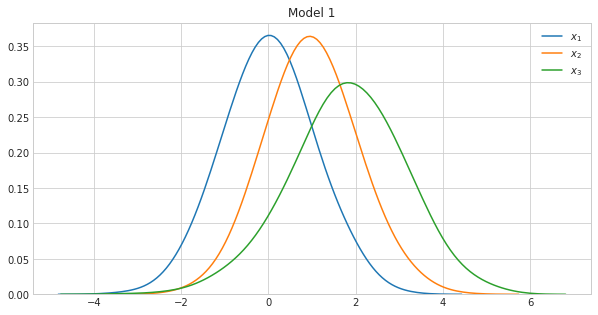

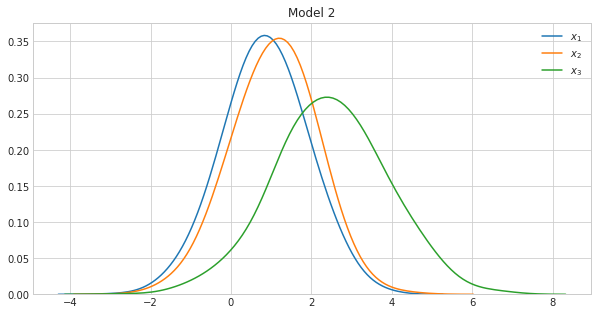

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from numpy.random import normal
from scipy.stats import multivariate_normal, norm, entropy

np.random.seed(37)
sns.set_style('whitegrid')
num_samples = 1000

x1 = normal(0, 1, num_samples)
x2 = normal(1, 1, num_samples)
x3 = normal(2 + 0.8 * x1 - 0.2 * x2, 1, num_samples)

data1 = data = np.column_stack((x1, x2, x3))
means1 = data1.mean(axis=0)
covs1 = np.cov(data1, rowvar=False)

x1 = normal(0.85, 1, num_samples)
x2 = normal(1.05, 1, num_samples)
x3 = normal(2 + 0.9 * x1 - 0.25 * x2, 1, num_samples)

data2 = np.column_stack((x1, x2, x3))
means2 = data2.mean(axis=0)
covs2 = np.cov(data2, rowvar=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Model 1')
sns.kdeplot(data1[:,0], bw=0.5, ax=ax, label=r'$x_{1}$')
sns.kdeplot(data1[:,1], bw=0.5, ax=ax, label=r'$x_{2}$')
sns.kdeplot(data1[:,2], bw=0.5, ax=ax, label=r'$x_{3}$')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Model 2')
sns.kdeplot(data2[:,0], bw=0.5, ax=ax, label=r'$x_{1}$')
sns.kdeplot(data2[:,1], bw=0.5, ax=ax, label=r'$x_{2}$')
sns.kdeplot(data2[:,2], bw=0.5, ax=ax, label=r'$x_{3}$')

In [2]:
p = multivariate_normal.pdf(data1, mean=means1, cov=covs1)
q = multivariate_normal.pdf(data1, mean=means2, cov=covs2)

print(entropy(p, p))
print(entropy(p, q))
print(entropy(q, p))

0.0
0.17877316564929518
0.18166531870987657


In [3]:
p = multivariate_normal.pdf(data2, mean=means2, cov=covs2)
q = multivariate_normal.pdf(data2, mean=means1, cov=covs1)

print(entropy(p, p))
print(entropy(p, q))
print(entropy(q, p))

0.0
0.1857262834508341
0.17856575086928178
